In [1]:
# Download MT-YOLOv6 repository and install requirements
!git clone https://github.com/meituan/YOLOv6
%cd YOLOv6
!pip install -r requirements.txt

Cloning into 'YOLOv6'...
remote: Enumerating objects: 2536, done.
remote: Counting objects: 100% (570/570), done.
remote: Compressing objects: 100% (166/166), done.
remote: Total 2536 (delta 451), reused 433 (delta 404), pack-reused 1966
Receiving objects: 100% (2536/2536), 29.14 MiB | 15.03 MiB/s, done.
Resolving deltas: 100% (1483/1483), done.
/content/YOLOv6
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 35.2 MB/s 
     |████████████████████████████████| 2.0 MB 52.2 MB/s 
     |████████████████████████████████| 237 kB 75.7 MB/s 
     |████████████████████████████████| 51 kB 7.3 MB/s 


In [10]:
# run this cell to begin training
!python tools/train.py \
--batch 32 \
--conf configs/yolov6s.py \
--epochs 100 \
--img-size 416 \
--data /content/drive/MyDrive/NNDL_Spring2022/CA3/YoloV6_Chess/data.yaml \
--device 0 \
--name nn_hw3_q3

Using 1 GPU for training... 
training args are: Namespace(batch_size=32, calib=False, check_images=False, check_labels=False, conf_file='configs/yolov6s.py', data_path='/content/drive/MyDrive/NNDL_Spring2022/CA3/YoloV6_Chess/data.yaml', device='0', dist_url='env://', distill=False, distill_feat=False, epochs=100, eval_final_only=False, eval_interval=20, gpu_count=0, heavy_eval_range=50, img_size=416, local_rank=-1, name='nn_hw3_q3', output_dir='./runs/train', quant=False, rank=-1, resume=False, save_ckpt_on_last_n_epoch=-1, save_dir='runs/train/nn_hw3_q3', stop_aug_last_n_epoch=15, teacher_model_path=None, temperature=20, workers=8, world_size=1, write_trainbatch_tb=False)

Train: Final numbers of valid images: 606/ labels: 606. 
0.2s for dataset initialization.
Convert to COCO format
100% 58/58 [00:00<00:00, 7625.77it/s]
Convert to COCO format finished. Resutls saved in /content/drive/MyDrive/NNDL_Spring2022/CA3/YoloV6_Chess/annotations/instances_valid.json
Val: Final numbers of valid

In [11]:
!python tools/eval.py \
--data /content/drive/MyDrive/NNDL_Spring2022/CA3/YoloV6_Chess/data.yaml \
--img-size 416 \
--weights /content/YOLOv6/runs/train/nn_hw3_q3/weights/best_ckpt.pt \
--device 0 \
--name nn_hw3_q3_eval \
--verbose

Namespace(batch_size=32, conf_thres=0.03, config_file='', data='/content/drive/MyDrive/NNDL_Spring2022/CA3/YoloV6_Chess/data.yaml', device='0', do_coco_metric=True, do_pr_metric=False, eval_config_file='./configs/experiment/eval_640_repro.py', force_no_pad=False, half=False, img_size=416, iou_thres=0.65, letterbox_return_int=False, name='nn_hw3_q3_eval', not_infer_on_rect=False, plot_confusion_matrix=False, plot_curve=True, reproduce_640_eval=False, save_dir='runs/val/', scale_exact=False, task='val', test_load_size=640, verbose=True, weights='/content/YOLOv6/runs/train/nn_hw3_q3/weights/best_ckpt.pt')
Loading checkpoint from /content/YOLOv6/runs/train/nn_hw3_q3/weights/best_ckpt.pt

Fusing model...
/usr/local/lib/python3.8/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: 

In [14]:
!python tools/infer.py \
--yaml /content/drive/MyDrive/NNDL_Spring2022/CA3/YoloV6_Chess/data.yaml \
--weights /content/YOLOv6/runs/train/nn_hw3_q3/weights/best_ckpt.pt \
--source /content/drive/MyDrive/NNDL_Spring2022/CA3/YoloV6_Chess/images/test/ \
--device 0 \
--name nn_hw3_q3_infer

Namespace(agnostic_nms=False, classes=None, conf_thres=0.4, device='0', half=False, hide_conf=False, hide_labels=False, img_size=[640, 640], iou_thres=0.45, max_det=1000, name='nn_hw3_q3_infer', not_save_img=False, project='runs/inference', save_dir=None, save_txt=False, source='/content/drive/MyDrive/NNDL_Spring2022/CA3/YoloV6_Chess/images/test/', view_img=False, weights='/content/YOLOv6/runs/train/nn_hw3_q3/weights/best_ckpt.pt', yaml='/content/drive/MyDrive/NNDL_Spring2022/CA3/YoloV6_Chess/data.yaml')
Save directory already existed
Loading checkpoint from /content/YOLOv6/runs/train/nn_hw3_q3/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
/usr/local/lib/python3.8/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100% 29/29 [00:

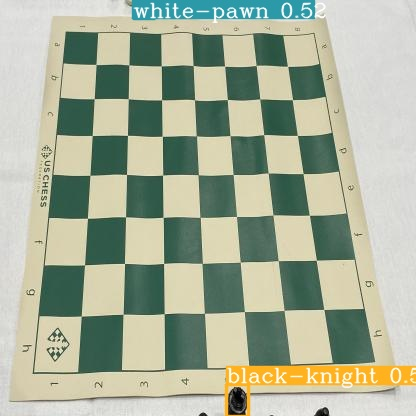

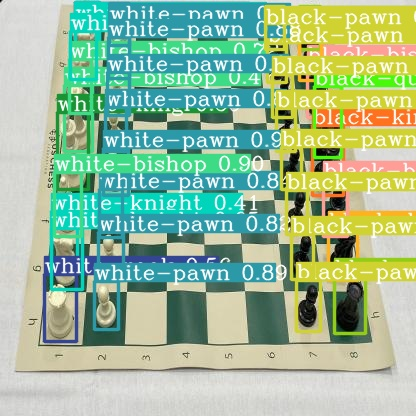

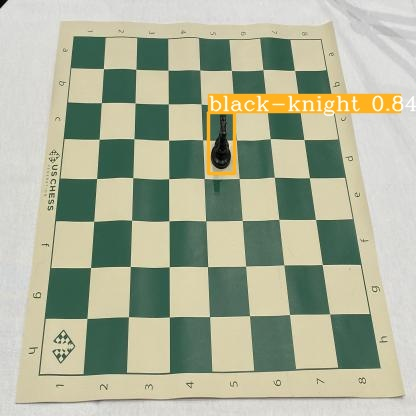

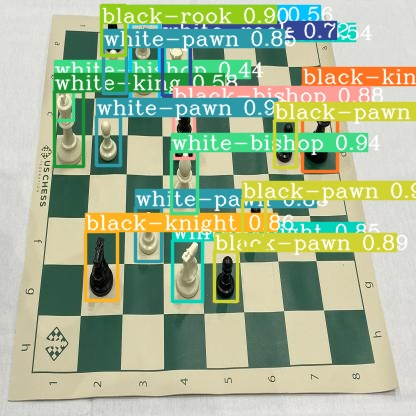

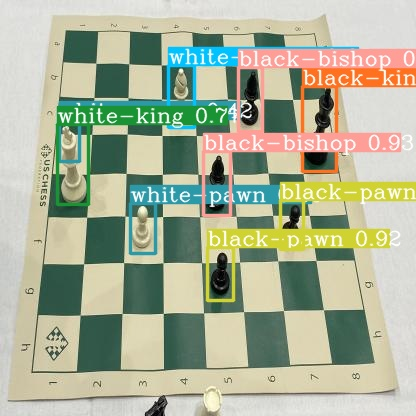

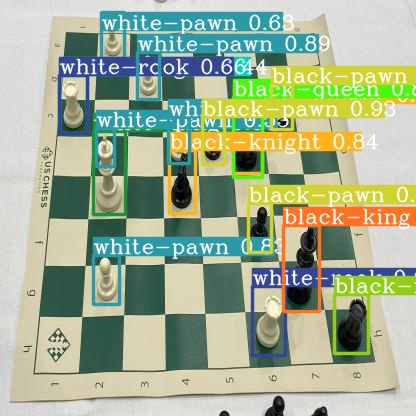

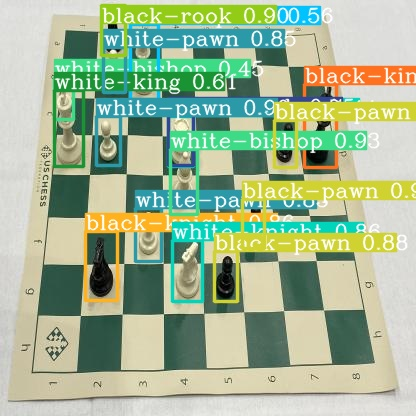

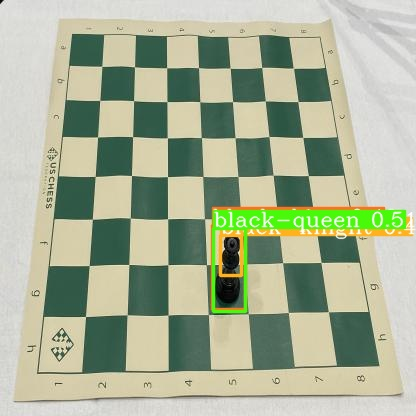

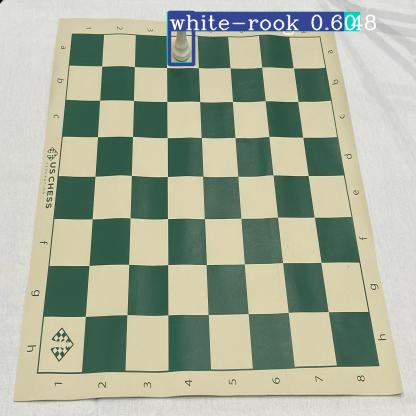

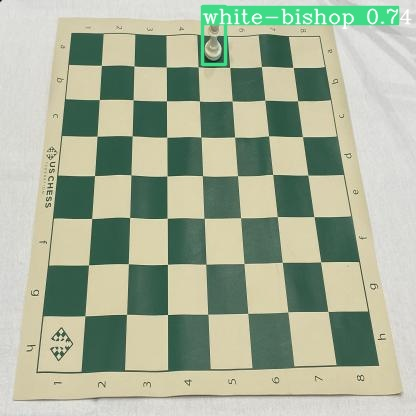

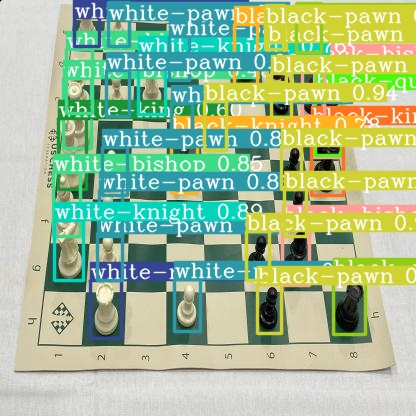

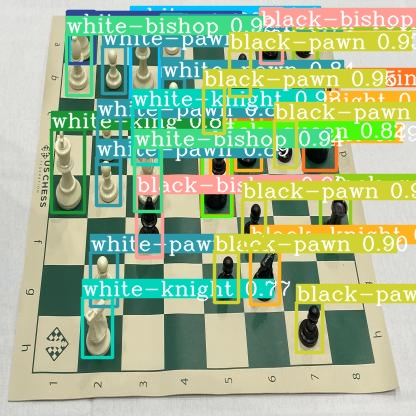

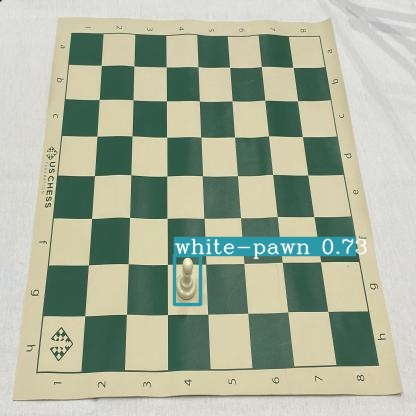

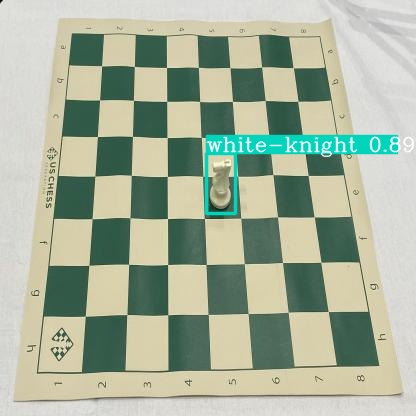

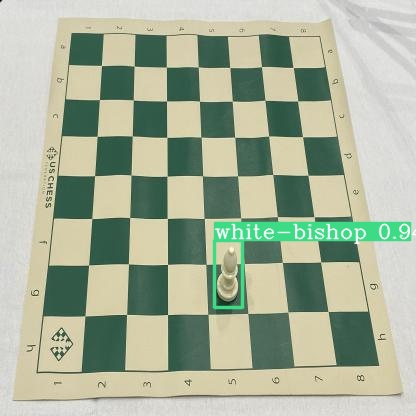

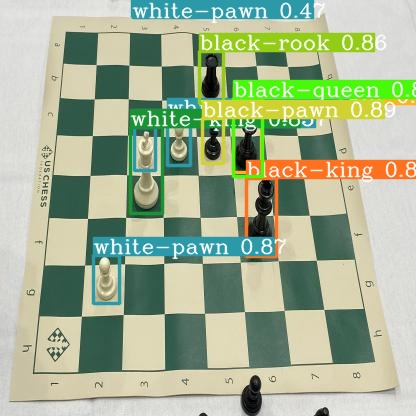

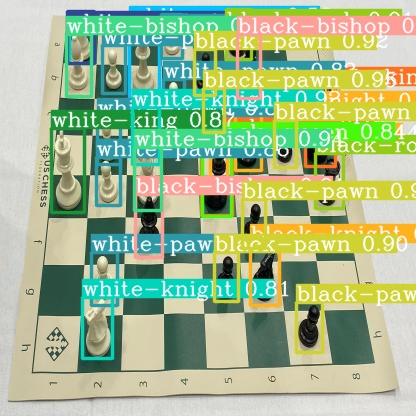

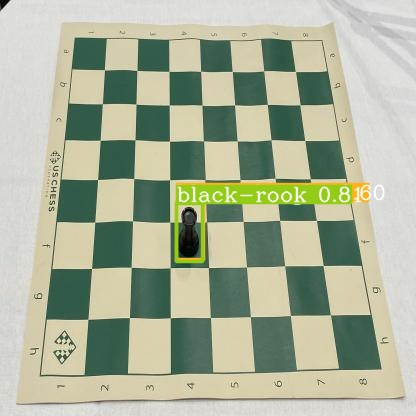

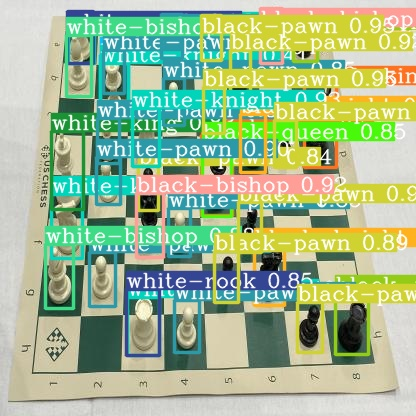

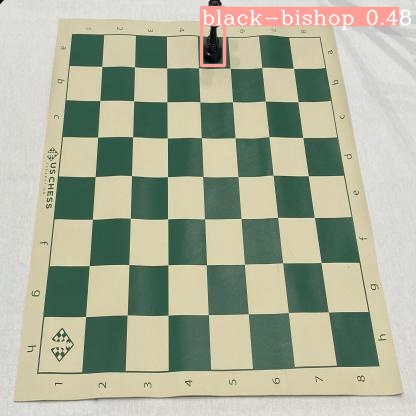

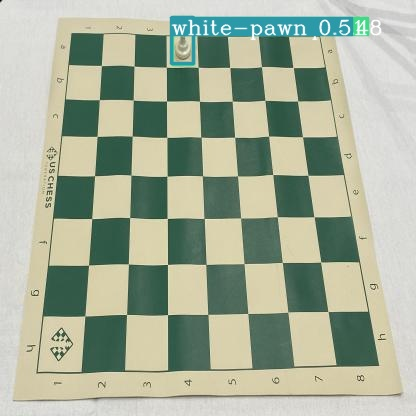

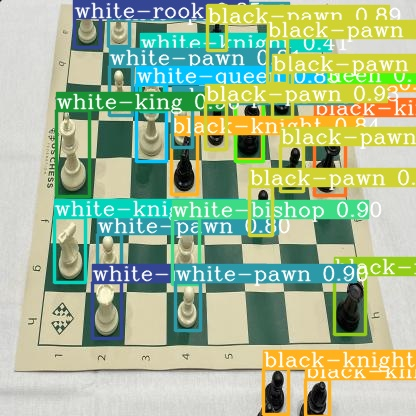

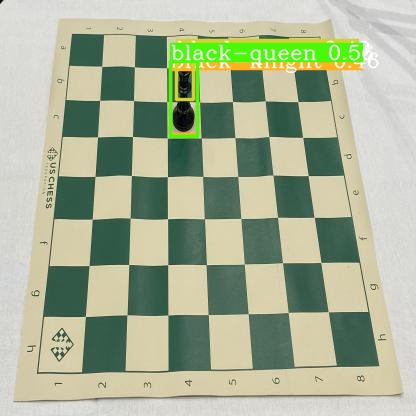

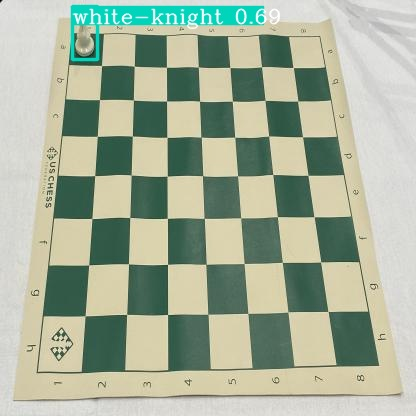

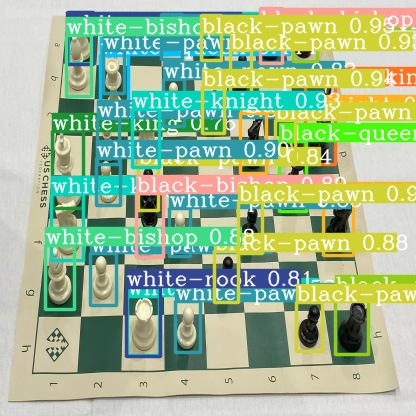

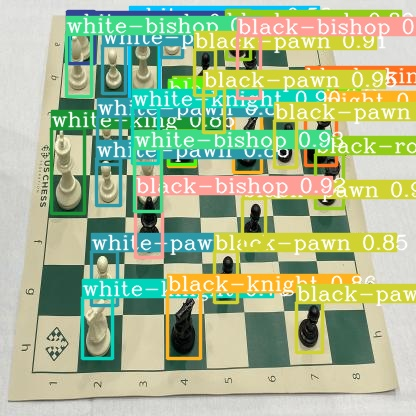

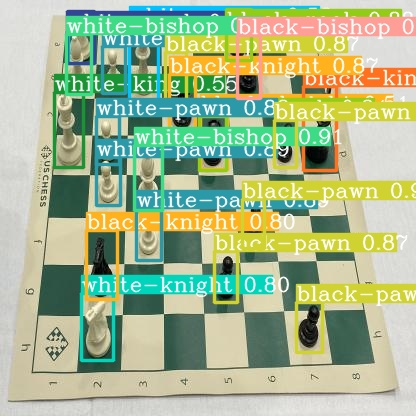

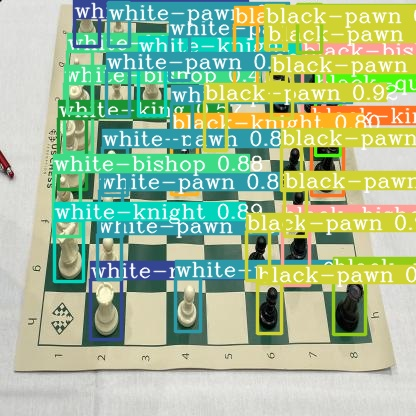

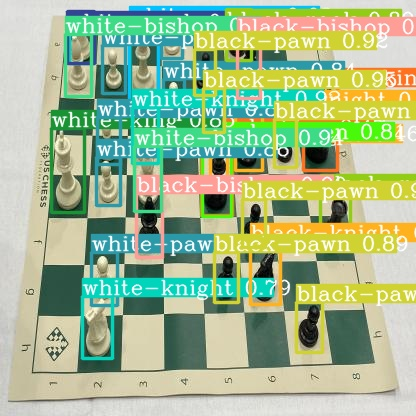

In [16]:
# display test inference result images
import glob
from IPython.display import Image, display

for imageName in glob.glob('./runs/inference/nn_hw3_q3_infer/*.jpg'):
      display(Image(filename=imageName))
      print("\n\n")
     
